___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [ ]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [ ]:
BAC=data.DataReader('BAC','stooq','12-31-2005','01-02-2016')
GS=data.DataReader('GS','stooq','12-31-2005','01-02-2016')
C=data.DataReader('C','stooq','12-31-2005','01-02-2016')
JPM=data.DataReader('JPM','stooq','12-31-2005','01-02-2016')
MS=data.DataReader('MS','stooq','12-31-2005','01-02-2016')
WFC=data.DataReader('WFC','stooq','12-31-2005','01-02-2016')

In [ ]:
BAC.index

DatetimeIndex(['2015-12-31', '2015-12-30', '2015-12-29', '2015-12-28',
               '2015-12-24', '2015-12-23', '2015-12-22', '2015-12-21',
               '2015-12-18', '2015-12-17',
               ...
               '2006-01-17', '2006-01-13', '2006-01-12', '2006-01-11',
               '2006-01-10', '2006-01-09', '2006-01-06', '2006-01-05',
               '2006-01-04', '2006-01-03'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [ ]:
tickers='BAC GS C JPM MS WFC'.split()
tickers.sort()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** I will use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. **

In [ ]:
bank_stocks=pd.concat(objs=[BAC, C, GS, JPM,MS,WFC],axis=1,keys=tickers)


In [ ]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [ ]:
bank_stocks.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [ ]:
bank_stocks.xs(axis=1,key='High',level=1).max()

Bank Ticker
BAC     46.6265
C      477.1550
GS     207.3260
JPM     58.1100
MS      60.2240
WFC     47.5885
dtype: float64

** Iwill create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock

In [ ]:
returns=pd.DataFrame()

In [ ]:
ticks2=[]
for item in tickers:
    ticks2.append(item+' Return')
    returns[item+' Return']=bank_stocks.xs(axis=1,key=(item,'Close'),level=[0,1]).apply(lambda x:x.pct_change())

In [ ]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010631,-0.018477,-0.013699,-0.014308,0.000821,-0.011607
2006-01-05,0.001329,0.004914,-0.000362,0.003130,0.002717,-0.000998
2006-01-06,-0.001550,0.000000,0.013989,0.007064,0.001025,0.005702
2006-01-09,0.000675,-0.004696,0.012032,0.016240,0.010445,0.000000


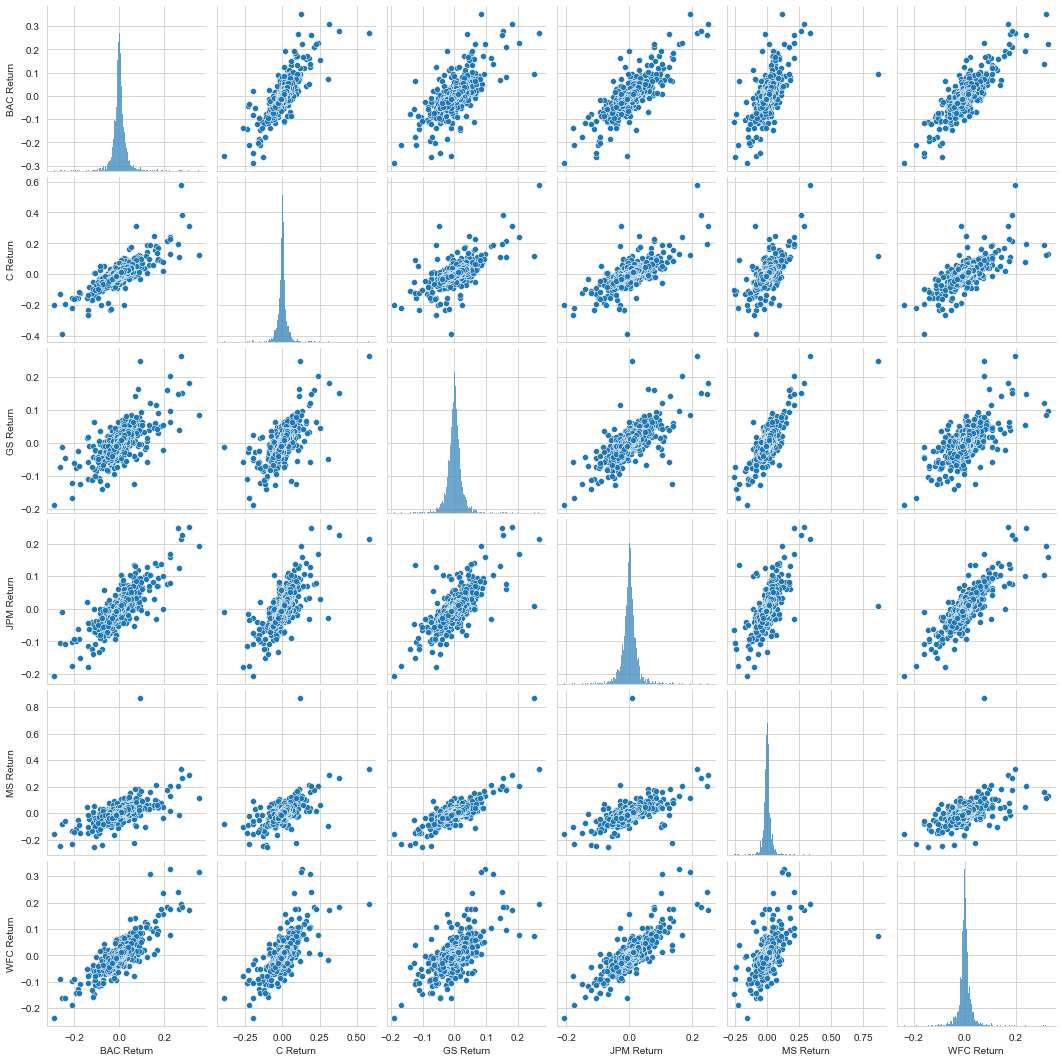

In [ ]:
sns.pairplot(data=returns[1:],diag_kind='hist')

In [ ]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [ ]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [ ]:
dum=returns.loc['2015-01-01':'2016-01-01']
dum.std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

In [ ]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

** I will create a distplot using seaborn of the 2015 returns for Morgan Stanley **

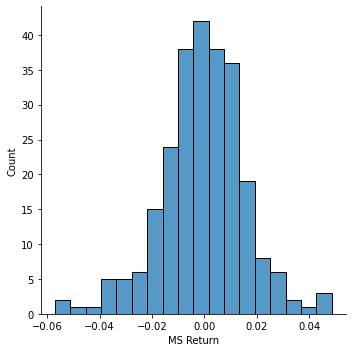

In [ ]:
sns.displot(x=dum['MS Return'])

** I will create a distplot using seaborn of the 2008 returns for CitiGroup **

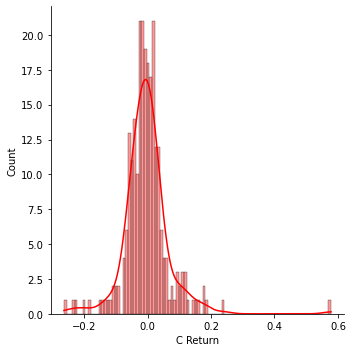

In [ ]:
sns.displot(x=returns.loc['2008-01-01':'2009-01-01']['C Return'],kde=True,color='red',bins=100,alpha=0.4)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [ ]:
bank_stocks.xs(axis=1,key='Close',level=1).iplot(size=(12,6))


## Moving Averages


C:\Users\alexa\AppData\Local\Temp\ipykernel_16376\857039220.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\alexa\AppData\Local\Temp\ipykernel_16376\857039220.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



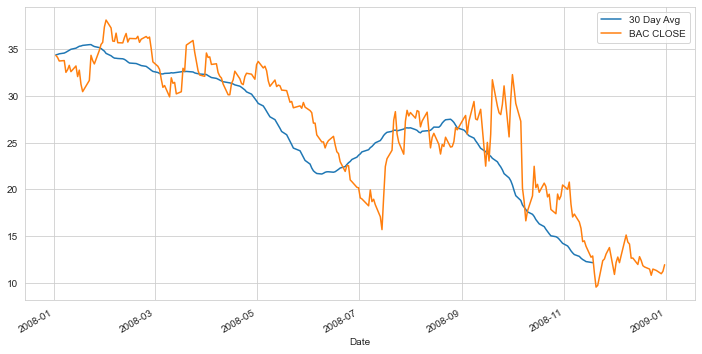

In [ ]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()


** Below is a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

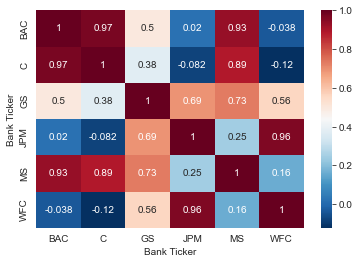

In [ ]:

sns.heatmap(data=bank_stocks.xs(key='Close',level=1,axis=1).corr(),cmap='RdBu_r',annot=True)

In [ ]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [ ]:
bank_stocks.xs(key=('BAC'),level=(0),axis=1).loc['2015-01-01':'2016-01-02'].iplot(kind='candle')

**We will create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [ ]:
bank_stocks.xs(key=('MS','Close'),level=(0,1),axis=1).loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

In [ ]:
bank_stocks.xs(key=('BAC','Close'),level=(0,1),axis=1).loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')